Mandatory Task (MT):
1. How image thresholding helps in each application mentioned in the materials?
2. Why the grayscale image showed color when plotted without using cmap=’gray’? Explain.

Optional Task (OT):
1. Take three images of your choice and apply different global thresholding on them.

Image thresholding is a fundamental technique in image processing that helps in various applications by simplifying the image data and enhancing specific features. Here's how it aids in each of the mentioned applications:

1. **Segmentation**:
   - **Role**: Thresholding helps in partitioning an image into different regions or objects based on pixel intensity values. By converting a grayscale image into a binary image, it separates the foreground (objects of interest) from the background.
   - **Benefit**: This separation is crucial for further analysis, such as identifying and isolating specific objects within the image.

2. **Object Detection**:
   - **Role**: Thresholding can be used to highlight objects of interest by setting pixel values above or below a certain threshold. This simplifies the image, making it easier to detect objects based on their intensity.
   - **Benefit**: It reduces the complexity of the image, allowing for more efficient object detection algorithms to be applied.

3. **Edge Detection**:
   - **Role**: Thresholding can be used in conjunction with edge detection algorithms to enhance the edges of objects. By thresholding the gradient magnitude of an image, edges can be more clearly defined.
   - **Benefit**: This helps in identifying the boundaries of objects, which is essential for tasks like shape analysis and object recognition.

4. **Image Enhancement**:
   - **Role**: Thresholding can improve the contrast of an image by setting pixel values to either the maximum or minimum value based on the threshold. This can make certain features more prominent.
   - **Benefit**: Enhanced images are easier to analyze and interpret, especially in cases where the original image has poor contrast.

5. **Pattern Recognition**:
   - **Role**: Thresholding simplifies the image by reducing it to a binary form, which can make patterns more apparent. This is particularly useful in applications like optical character recognition (OCR) and texture analysis.
   - **Benefit**: Simplifying the image to binary form helps in identifying and classifying patterns more accurately and efficiently.

In summary, image thresholding aids in these applications by reducing the complexity of the image data, enhancing specific features, and making it easier to perform further analysis and interpretation.

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


### The difference in color space between `matplotlib` and `cv2` when displaying images arises from how these libraries handle image data by default.

1. **Matplotlib (`plt.imshow`)**:
   - Matplotlib, on the other hand, expects images to be in RGB format. When you use `plt.imshow`, it assumes the image is in RGB order.
   - If you pass an image loaded with OpenCV (which is in BGR) directly to `plt.imshow`, the colors will appear incorrect because Matplotlib interprets the BGR channels as RGB.


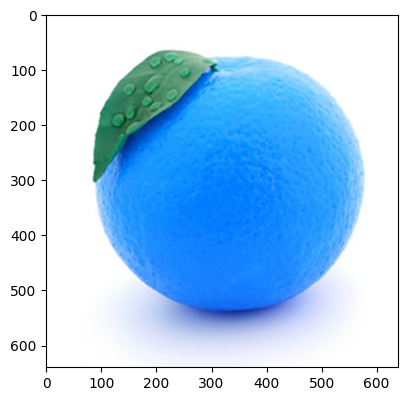

In [2]:
img = cv2.imread('/content/terzis-fruits-orange.jpg')

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)

plt.show()

2. **OpenCV (`cv2`)**:
   - OpenCV loads images in BGR (Blue, Green, Red) format by default. This means that the color channels are ordered as BGR instead of the more common RGB.
   - When you use `cv2.imshow` or `cv2_imshow`, the image is displayed in BGR format, which is how OpenCV internally represents the image.

   To correct this, you need to convert the image from BGR to RGB before displaying it with Matplotlib. You can do this using `cv2.cvtColor`:


This conversion ensures that the colors are displayed correctly when using Matplotlib. If you don't perform this conversion, the colors in the image will appear distorted because Matplotlib will misinterpret the BGR channels as RGB.

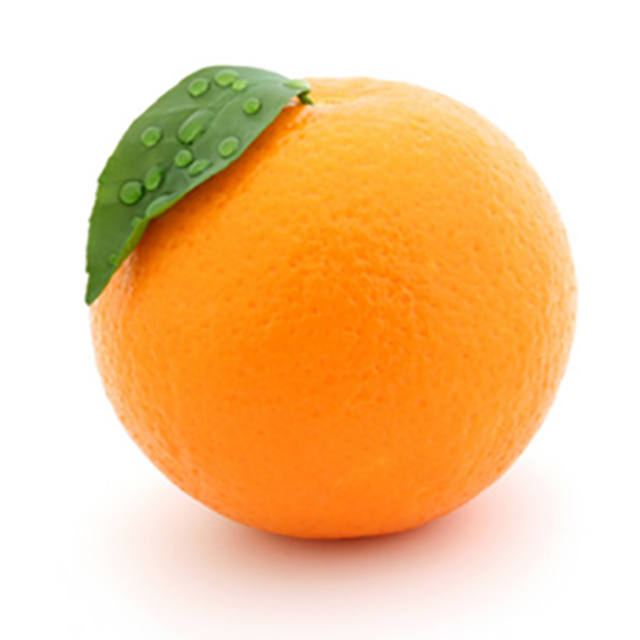

In [3]:
cv2_imshow(img)
plt.show()

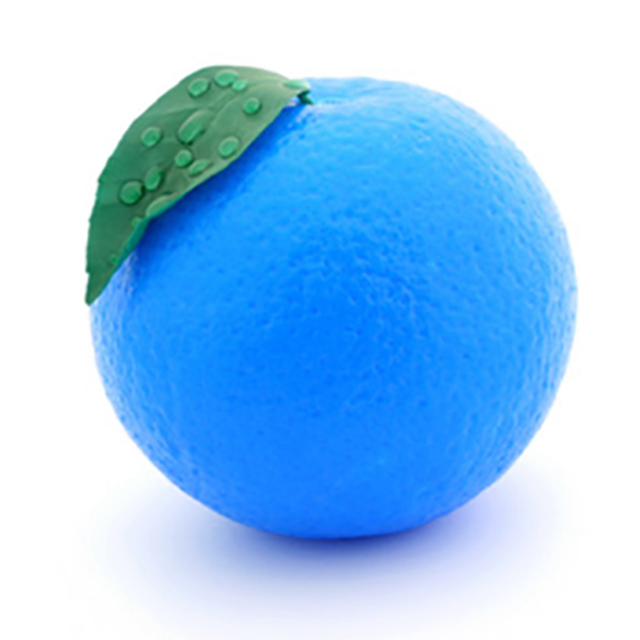

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2_imshow(img_rgb)

# Qs: 2: Why the grayscale image showed color when plotted without using cmap=’gray’? Explain.

When you display a grayscale image using plt.imshow() without specifying the colormap (cmap), Matplotlib defaults to using a colormap that is not grayscale. This can result in the grayscale image being displayed with colors instead of shades of gray.

### Default Colormap in Matplotlib:

Matplotlib uses the viridis colormap by default for displaying images. This colormap maps scalar values to a range of colors, typically from blue to yellow.

When you pass a grayscale image (which is a 2D array of intensity values) to plt.imshow(), Matplotlib applies this colormap to the intensity values, resulting in a colored image.

In [5]:
img_gray = cv2.imread('/content/terzis-fruits-orange.jpg', cv2.IMREAD_GRAYSCALE)

100.0
230.0
230.0
200.0
150.0
150.0


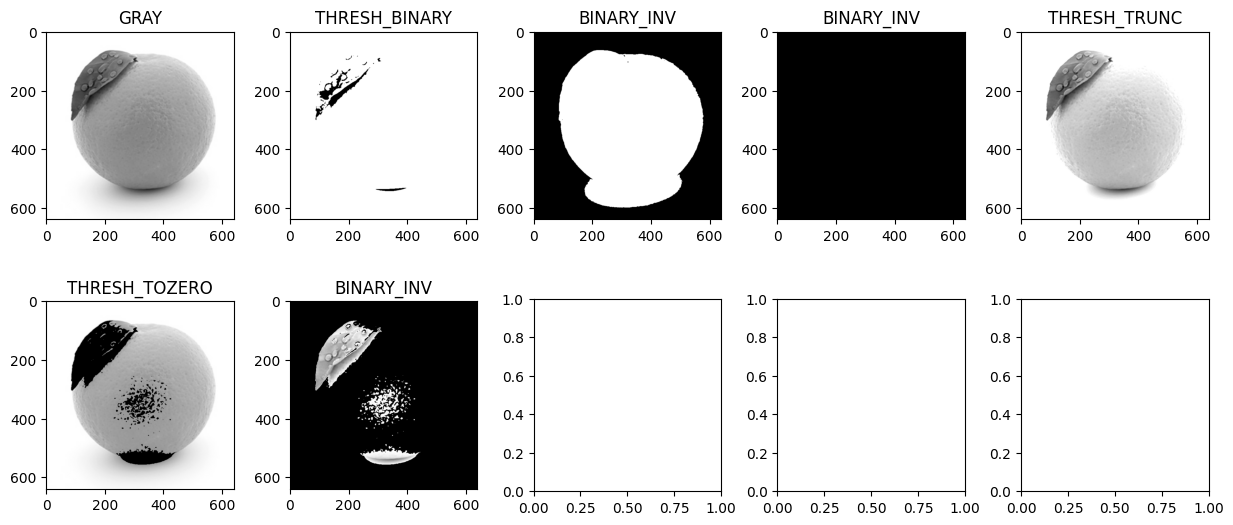

In [20]:
# cv2_imshow(img_gray)

fig, axis = plt.subplots(2, 5, figsize=(15,6))
plt.subplots_adjust(hspace=0.4, wspace=0.3) # Add space between rows and columns

axis[0, 0].imshow(img_gray, cmap='gray')
axis[0, 0].set_title('GRAY')

retval, thresholded = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)
axis[0, 1].imshow(thresholded, cmap='gray')
axis[0, 1].set_title('THRESH_BINARY')
print(retval)

retval, thresholded = cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY_INV)
axis[0, 2].imshow(thresholded, cmap='gray')
axis[0, 2].set_title('BINARY_INV')
print(retval)


retval, thresholded = cv2.threshold(img_gray, 230, 0, cv2.THRESH_BINARY_INV)
axis[0, 3].imshow(thresholded, cmap='gray')
axis[0, 3].set_title('BINARY_INV')
print(retval)

retval, thresholded = cv2.threshold(img_gray, 200, 255, cv2.THRESH_TRUNC)
axis[0, 4].imshow(thresholded, cmap='gray')
axis[0, 4].set_title('THRESH_TRUNC')
print(retval)

retval, thresholded = cv2.threshold(img_gray, 150, 255, cv2.THRESH_TOZERO)
axis[1, 0].imshow(thresholded, cmap='gray')
axis[1, 0].set_title('THRESH_TOZERO')
print(retval)
# 150 er theke boro px_val gulo unchanged
# 150 er theke choto px_value gulo 0/black

retval, thresholded = cv2.threshold(img_gray, 150, 255, cv2.THRESH_TOZERO_INV)
axis[1, 1].imshow(thresholded, cmap='gray')
axis[1, 1].set_title('BINARY_INV')
print(retval)

plt.show()